In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from sbi.inference.base import infer
from sbi import utils as utils
from sbi import analysis as analysis
from torch.distributions import Normal

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-21 21:05:50.122492: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from sbi_tools import TruncatedNormal, get_SNPE_posterior, SymmetricTruncatedNormal
from simulators import Simulator
from spectralcomponents import PowerLaw, GaussianEmissionLine

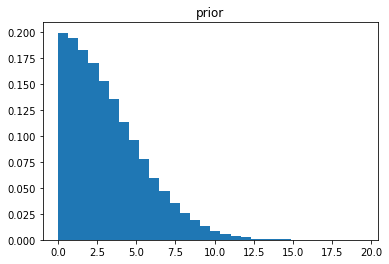

In [4]:
plt.hist(np.array(SymmetricTruncatedNormal(loc=torch.tensor([0.]), scale=torch.tensor([4.0])).sample((100000,))), bins=30, density=True)
plt.title('prior')
plt.show()

In [5]:
c1 = PowerLaw()
true_params = (1, 1)

prior = [SymmetricTruncatedNormal(loc=torch.tensor([0.0]), scale=torch.tensor([1.0])),
         SymmetricTruncatedNormal(loc=torch.tensor([0.0]), scale=torch.tensor([1.0])),]

def simulate_simple(params):
    simulator =  Simulator(c1, 1000, pileup='channels')
    return simulator((params))

posterior = get_SNPE_posterior(prior, simulate_simple, num_simulations=1000)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sbi/utils/user_input_checks.py:76: UserWarning: Prior was provided as a sequence of 2 priors. They will be
            interpreted as independent of each other and matched in order to the
            components of the parameter.
  warnings.warn(
Running 1000 simulations.: 100%|██████████| 1000/1000 [2:57:15<00:00, 10.64s/it]   


 Neural network successfully converged after 46 epochs.

Drawing 10000 posterior samples: 100%|██████████| 10000/10000 [00:00<00:00, 23780.27it/s]


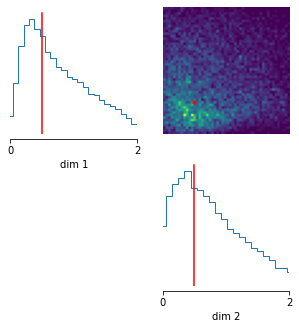

In [22]:
true_params = (0.5, 0.5)
true_x = simulate_simple(torch.tensor(true_params))
samples = posterior.sample((10000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 10000 posterior samples: 100%|██████████| 10000/10000 [00:00<00:00, 24475.19it/s]


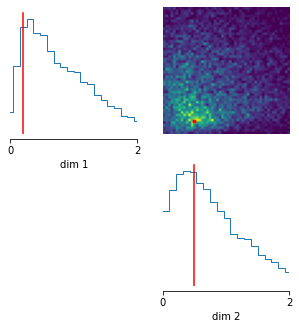

In [15]:
true_params = (0.2, 0.5,)
true_x = simulate_simple(torch.tensor(true_params))
samples = posterior.sample((10000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 10000 posterior samples: 100%|██████████| 10000/10000 [00:00<00:00, 24645.40it/s]


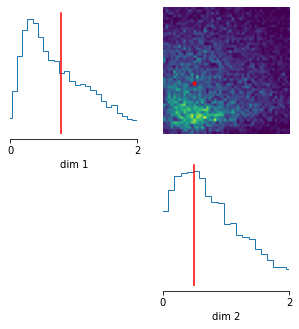

In [16]:
true_params = (0.8, 0.5,)
true_x = simulate_simple(torch.tensor(true_params)).reshape(1, -1)
samples = posterior.sample((10000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 10000 posterior samples: 100%|██████████| 10000/10000 [00:00<00:00, 14522.33it/s]


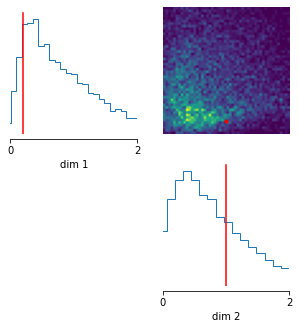

In [17]:
true_params = (0.2, 1,)
true_x = simulate_simple(torch.tensor(true_params)).reshape(1, -1)
samples = posterior.sample((10000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 10000 posterior samples: 100%|██████████| 10000/10000 [00:01<00:00, 8752.96it/s]


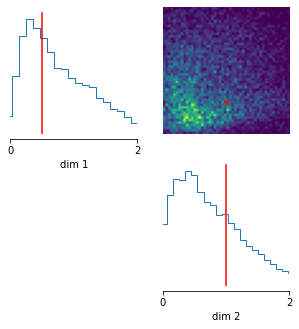

In [20]:
true_params = (0.5, 1.,)
true_x = simulate_simple(torch.tensor(true_params))
samples = posterior.sample((10000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 10000 posterior samples: 100%|██████████| 10000/10000 [00:00<00:00, 14613.43it/s]


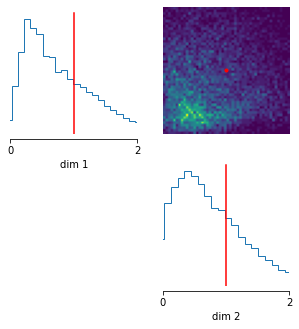

In [21]:
true_params = (1., 1.,)
true_x = simulate_simple(torch.tensor(true_params)).reshape(1, -1)
samples = posterior.sample((10000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

In [30]:
from sbi.utils.torchutils import BoxUniform

c1 = PowerLaw()
true_params = (1, 1)

uniform_prior = BoxUniform(low=torch.tensor([0.0, 0.0]), high=torch.tensor([2.0, 2.0]))

def simulate_simple(params):
    simulator = Simulator(c1, 1000, pileup='channels')
    data = np.clip(simulator((params)), 0, 1023)
    return np.bincount(data.astype(int), minlength=1024)

posterior_uniform = get_SNPE_posterior(uniform_prior, simulate_simple, num_simulations=100)

Running 100 simulations.: 100%|██████████| 100/100 [25:42<00:00, 15.42s/it] 


 Neural network successfully converged after 59 epochs.

Drawing 10000 posterior samples: 10748it [00:00, 19750.49it/s]                          


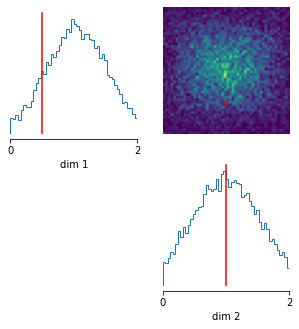

In [32]:
true_params = (0.5, 1,)
true_x = simulate_simple(torch.tensor(true_params)).reshape(1, -1)
samples = posterior_uniform.sample((10000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 100000 posterior samples: 101735it [00:06, 16430.32it/s]                           


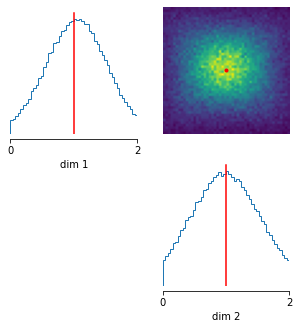

In [35]:
true_params = (1, 1,)
true_x = simulate_simple(torch.tensor(true_params))
samples = posterior_uniform.sample((100000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 100000 posterior samples: 101428it [00:11, 8562.32it/s]                            


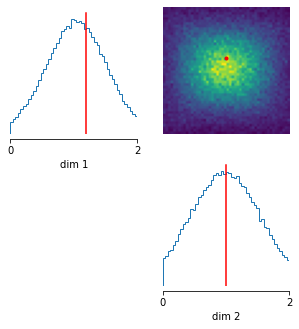

In [36]:
true_params = (1.2, 1,)
true_x = simulate_simple(torch.tensor(true_params)).reshape(1, -1)
samples = posterior_uniform.sample((100000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 1000000 posterior samples: 1001177it [01:15, 13255.53it/s]                            


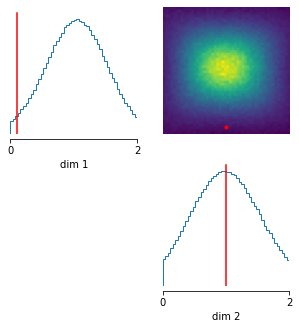

In [38]:
true_params = (0.1, 1,)
true_x = simulate_simple(torch.tensor(true_params)).reshape(1, -1)
samples = posterior_uniform.sample((1000000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 100000 posterior samples: 101634it [00:12, 8450.57it/s]                            


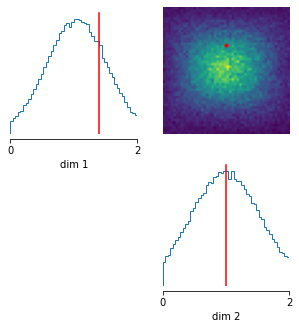

In [37]:
true_params = (1.4, 1.,)
true_x = simulate_simple(torch.tensor(true_params)).reshape(1, -1)
samples = posterior_uniform.sample((100000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.0, 2], [0.0, 2]],
    ticks=[[0.0, 2], [0.0, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);